# Notebook to summarise demographics info of the whole cohort  

In [1]:
import os
import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
meld_bids_folder = '/home/mathilde/Documents/RDS/MELD_FE/DATA'

site_paths = glob.glob(os.path.join(meld_bids_folder,'MELD_*'))

print(site_paths)

['/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H2', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H101', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H28', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H4', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H21', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5_old', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H103', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H108', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H19', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H45', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H16', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H102', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H104', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H115', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H47', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H14', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H10', '/home/mathilde/Docum

In [3]:
# concatenate all the demographic

df = pd.DataFrame()
for site_path in site_paths:
    site_code = os.path.basename(site_path).split('MELD_')[-1]
    if 'old' in site_code:
        print(f'Not taken in consideration because old data {site_path}')
        continue
    demographic_files = glob.glob(os.path.join(site_path,f'MELD_participants_infos_{site_code}_*.csv'))
    #get QC files
    demographic_files = [s for s in demographic_files if 'QC' not in s]
    if demographic_files == []:
        print(f'No demographic file for site {site_path}')
    elif len(demographic_files) == 1:
        demographic_file = demographic_files[0]
        if os.path.isfile(demographic_file):
            df_site = pd.read_csv(demographic_file)
            df = pd.concat([df, df_site])
        else:
            print(f'{site_code} does not have a demographic files')
    else:
        print(f'There are multiple demographic file at {site_path}')

Not taken in consideration because old data /home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5_old
No demographic file for site /home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_participants_info_template


In [4]:
df.head()

,id,Unnamed: 1,included,reason exclusion,old_id,redcap_data_access_group,site,patient_control,sex,radiology,...,lesion_mask.1,what still need to be retrieved,age_t1_preop,notes,Unnamed: 58,Unnamed: 59,reason_exclusion,Unnamed: 55,Unnamed: 0,reason exlusion
0,MELD_H2_P_0001,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MELD_H2_P_0002,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MELD_H2_P_0003,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MELD_H2_P_0004,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MELD_H2_P_0005,NaN,1.0,NaN,NaN,h2,H2,1.0,0.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# only select subjects included 
df = df.reset_index()
subdf = df[df['included']==1]

In [6]:
# get list and number of sites
sites = list(set(subdf['site'].values))
sites = [site for site in sites if str(site).startswith("H")]
num_sites = len(sites)
print(f'number of sites: {num_sites}')
print(sites)

number of sites: 18
['H102', 'H21', 'H47', 'H16', 'H115', 'H4', 'H19', 'H11', 'H103', 'H14', 'H101', 'H10', 'H5', 'H45', 'H104', 'H2', 'H108', 'H28']


In [7]:
# number of subjects
num_subjects = len(subdf)
print(f'total num subjects: {num_subjects}')


total num subjects: 2636


In [8]:
# patients or controls

num_patients = len(subdf[subdf['patient_control']==1])
num_controls = len(subdf[subdf['patient_control']==2])

print('Group: {} patients - {} controls'.format(int(num_patients), int(num_controls)))

Group: 1528 patients - 1108 controls


In [9]:
# male vs female

subdf.groupby(['patient_control','sex'])['id'].count()



patient_control  sex
1.0              0.0    786
                 1.0    742
2.0              0.0    399
                 1.0    709
Name: id, dtype: int64

site  patient_control
H10   1.0                 59
      2.0                269
H101  1.0                 85
      2.0                 84
H102  1.0                 63
H103  2.0                 41
H104  1.0                 18
H108  1.0                 10
      2.0                568
H11   1.0                147
H115  1.0                 44
H14   1.0                141
H16   1.0                 44
H19   1.0                100
H2    1.0                102
      2.0                 56
H21   1.0                 88
H28   1.0                 10
H4    1.0                130
      2.0                 90
H45   1.0                 18
H47   1.0                  6
H5    1.0                463
Name: id, dtype: int64


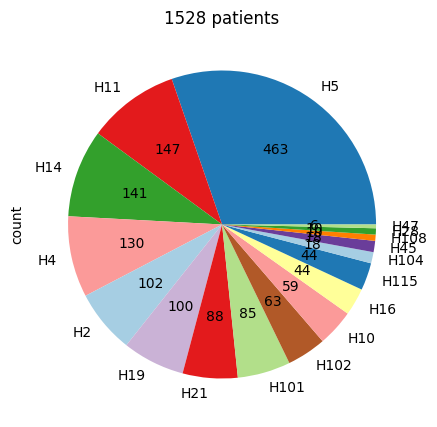

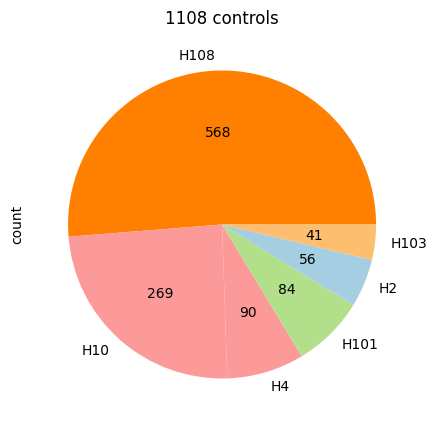

In [10]:
#breakdown of patients and controls per site
print(subdf.groupby(['site','patient_control'])['id'].count())

# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()

fig, ax = plt.subplots(figsize=(5,5))
ax = site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index],
)
plt.title(f'{num_patients} patients')
plt.show()


# Create a pie chart for controls
fig, ax = plt.subplots(figsize=(5,5))
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
ax=site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index]
)
plt.title(f'{num_controls} controls')
plt.show()

### Analyse histopathologies

In [25]:
data_dictionary = {1: 'FCD 1' ,
                   2: 'FCD 2A',
                   3: 'FCD 2B',
                   4: 'FCD 3A',
                   5: 'FCD 3B',
                   6: 'FCD 3C',
                   7: 'FCD 3D',
                   8: 'FCD 2 not otherwise specified',
                   9: 'FCD not otherwise specified',
                   10: 'Hippocampal sclerosis',
                   11: 'Hippocampal gliosis only',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}

main_categories = {1: 'FCD' ,
                   2: 'FCD',
                   3: 'FCD',
                   4: 'FCD',
                   5: 'FCD',
                   6: 'FCD',
                   7: 'FCD',
                   8: 'FCD',
                   9: 'FCD',
                   10: 'HS and other',
                   11: 'HS and other',
                   12: 'Other', 
                   13: 'LEAT',
                   14: 'LEAT',
                   15: 'LEAT',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Other',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}

def is_nan(x):
    return (x != x)

def extract_categories(value):
    if isinstance(value, float):
        value = int(value)
    if isinstance(value, int):
        return main_categories[value]
    elif isinstance(value, str):
        if ';' in value:
            values = value.split(';')
            categories =np.array([main_categories[int(x)] for x in values])
            if len(np.unique(categories))==1:
                return np.unique(categories)[0]
            else:
                return False
        else:
            try:
                return main_categories[int(value)]
            except:
                print(f'{value} put other')
                return 'Other'
    else:
        print(f'need to check category {value}')
        return False
        
def is_category_HS(value):
    if not is_nan(value):
        if isinstance(value, str):
            if ';' in value:
                values = [int(v) for v in value.split(';')]
            else:
                try:
                    values = [int(value)]
                except:
                    print(f'Error with value {value}')
        else:
            values = [value]
        for v in values: 
            if (int(v) == 4) | (int(v) == 10) | (int(v) == 11):
                return True
    return False
        
def apply_category(row):
    ''' input = histology, radiological diagnosis
        output= category, histologically_confirmed, has_HS
        rules:
        Look at histology
        - if histology is a unique category 
            --> category = histology , histologically_confirmed= True, has_HS=True if histology is HS or FCD 3
        - elif histology is multiple categories:
            - if multiple categories from the same group:
                --> category = group (e.g DNET and/or ganglioglioma are LEAT), histologically_confirmed = True, has_HS=True if one histology is HS or FCD 3
            - else:
                --> category = Other, histologically_confirmed = True, has_HS=True if one histology is HS or FCD 3
        - elif histology is nan:
            take radiological diagnosis
            - if radiological diagnosis is a unique category 
                --> category = radiological diagnosis, histologically_confirmed = False, has_HS=True if one radiology is HS or FCD 3
            - elif  radiological diagnosis is multiple categories/
                - if multiple categories from the same group:
                    --> category = group (e.g DNET, ganglioglioma are LEAT), histologically_confirmed = False, has_HS=True if one radiology is HS or FCD 3
                - else:
                    --> category = Other, histologically_confirmed = False, has_HS=True if one radiology is HS or FCD 3              
            '''
            
    if row['patient_control']==2:
        return 'Healthy control', False, False
    #find the ground truth - if no histology take radiology
    ground_truth = 'histology'
    histologically_confirmed = True
    if is_nan(row['histology']):
        ground_truth = 'radiology' 
    if '23' in str(row['histology']):
        ground_truth = 'radiology'
    # extract main category from ground truth   
    category = extract_categories(row[ground_truth])
    #if histology category is false, look at radiology
    if (category is False) and (ground_truth=='histology'):
        ground_truth = 'radiology'
        category = extract_categories(row[ground_truth])
        if category is False:
            category ='Other'
            print(f'error - need to check {row[ground_truth]}')
    if (category is False) and (ground_truth=='radiology'):
        category = 'Other'
    #find if histologically confirmed
    if ground_truth=='radiology':
        histologically_confirmed = False
    #finf if one category is HS
    has_HS = is_category_HS(row[ground_truth])
    return category, histologically_confirmed, has_HS

list_categories = ['FCD', 'HS and other', 
                #    'Cortical gliosis only', 
                  'LEAT',
                   'Polymicrogyria', 'Periventricular nodular heterotopia',
                   'Cavernoma', 'Hypothalamic hamartoma', 
                #    'Non-specific pathology',
                    'Other', 'Healthy control',
                  ]

threshold_categories = {
                'FCD': 500,
                'HS and other': 300,
                # 'Cortical gliosis only' :100, 
                # 'DNET': 100,
                # 'Ganglioglioma': 100,
                # 'other low-grade tumour': 100,
                'LEAT': 300,
                'Polymicrogyria': 100,
                'Periventricular nodular heterotopia': 100,
                'Cavernoma' : 100,
                # 'Non-specific pathology' : 0,
                # 'Normal': 0,
                'Hypothalamic hamartoma': 100,
                'Other': 0,
                'Healthy control': 500,
}


In [26]:
subdf[subdf['id']=='MELD_H5_P_0070'].apply(lambda row : apply_category(row), axis=1,  result_type='expand')

,0,1,2
227,Other,False,True


error - need to check 9;10;13
error - need to check 10;13
error - need to check 9;16
error - need to check 10;18
error - need to check 10;18
error - need to check 13;14;23
error - need to check 10;13
error - need to check 9;10
error - need to check 10;13
error - need to check 10;13
patient_control  main_category                      
1.0              False                                     4
                 Cavernoma                                68
                 FCD                                     622
                 HS and other                            379
                 Hypothalamic hamartoma                   19
                 LEAT                                    234
                 Normal                                   78
                 Other                                    81
                 Periventricular nodular heterotopia      23
                 Polymicrogyria                           20
2.0              Healthy control                      

/tmp/ipykernel_5183/571208601.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
/tmp/ipykernel_5183/571208601.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Distribution of histopathology')

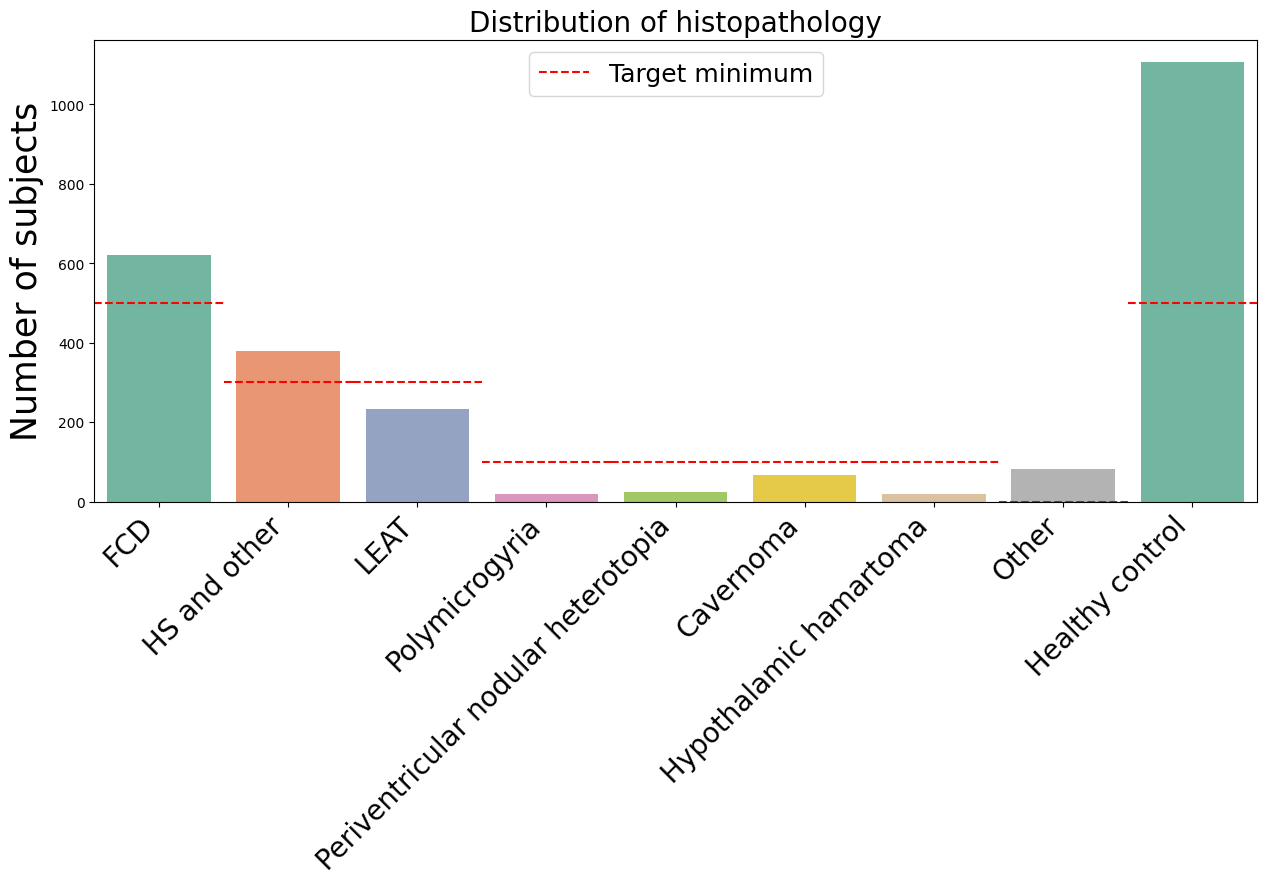

In [13]:
# recategorise histologies or radiology
df_tmp = subdf.apply(lambda row : apply_category(row), axis=1,  result_type='expand')

df_tmp.columns = ['main_category','histologically_confirmed','has_HS']
subdf = pd.concat([subdf, df_tmp], axis=1).reset_index()
print(subdf.groupby(['patient_control','main_category'])['id'].count())

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category

    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Threshold ({category}: {threshold_value})', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax.legend([ax.get_legend_handles_labels()[0][0]],['Target minimum'], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology', fontsize=20)

### look at lesion mask provided


In [12]:
# # check in MELD BIDS that lesion MASK exists

# def harmonise_meld_name(name):
#     split = name.split('_')  
#     # exclude specific characters
#     harmo_name= ''.join(split)
    
#     return harmo_name

# lesion_mask_MRI=[]
# resection_mask_MRI = []
# for i,row in subdf.iterrows():
#     subject = 'sub-'+harmonise_meld_name(row['id'])
#     site = row['site']
#     files = glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_lesion*.nii*") + glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_roi*.nii*")+ glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_resection*.nii*") 
#     if len(files)>0:
#         lesion_mask_MRI.append(1)
#         if 'resection' in files[0]:
#             resection_mask_MRI.append(1)
#         else:
#             resection_mask_MRI.append(0)
#     else:
#         lesion_mask_MRI.append(0)
#         resection_mask_MRI.append(0)
# subdf['lesion_mask_MRI']=lesion_mask_MRI
# subdf['resection_mask_MRI']=resection_mask_MRI

In [13]:
# print(subdf.groupby(['main_category','lesion_mask_MRI'])['id'].count())

In [14]:
# print(subdf.groupby(['site','lesion_mask_MRI'])['id'].count())

In [15]:
# # add number of lesions mask provided

# fig, ax = plt.subplots(figsize=(15,6))
# g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
# ax.set_ylabel('Number of subjects', fontsize=25)
# ax.set_xlabel('')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# # ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# # Add threshold lines above each category
# for category, threshold_value in threshold_categories.items():
#     category_index = list_categories.index(category)  # Get the index of the category
#     ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# # Add lines number of lesion mask provided above each category
# for category in list_categories:
#     number_lesion = subdf[subdf['main_category']==category]['lesion_mask_MRI'].sum()
#     category_index = list_categories.index(category)  # Get the index of the category
#     ax.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion mask provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# ax.legend([ax.get_legend_handles_labels()[0][0], ax.get_legend_handles_labels()[0][-1]],[ax.get_legend_handles_labels()[1][0], ax.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=18)
# ax.set_title('Distribution of histopathology', fontsize=20)

### add qc info

In [14]:
file_qc = os.path.join(meld_bids_folder, 'summary_qc_auto_240308.csv')

df_qc = pd.read_csv(file_qc)
subdf_qc = pd.DataFrame()
subdf_qc['id'] = df_qc['study ID'].values
subdf_qc['T1_available_QC'] = df_qc['T1-Preop QC (0=to discard, 1=usable)'].values
subdf_qc['FLAIR_available_QC'] = df_qc['FLAIR QC (0=to discard, 1=usable)'].values
subdf_qc['T2_available_QC'] = df_qc['T2 QC (0=to discard, 1=usable)'].values
subdf_qc['Postop_available_QC'] = df_qc['T1-Postop QC (0=to discard, 1=usable)'].values
subdf_qc['mask_available_QC'] = [1 if x==1 or x==2 else 0 for x in df_qc['mask QC ( 0=not correct, 1=correct , 2= seem correct but no postop to check, 3= mask missing, 4=mask required, 5=mask is resection cavity)'].values]


subdf_merge = subdf.merge(subdf_qc, on='id', how='left')
subdf_merge = subdf_merge.drop(columns=['index'])
subdf_merge

,level_0,id,Unnamed: 1,included,reason exclusion,old_id,redcap_data_access_group,site,patient_control,sex,...,Unnamed: 0,reason exlusion,main_category,histologically_confirmed,has_HS,T1_available_QC,FLAIR_available_QC,T2_available_QC,Postop_available_QC,mask_available_QC
0,0,MELD_H2_P_0001,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,HS and other,False,True,1.0,1.0,1.0,NaN,0
1,1,MELD_H2_P_0002,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,HS and other,True,True,1.0,1.0,1.0,1.0,1
2,2,MELD_H2_P_0003,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,FCD,True,False,1.0,1.0,1.0,1.0,1
3,3,MELD_H2_P_0004,NaN,1.0,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,LEAT,False,False,1.0,1.0,1.0,NaN,1
4,4,MELD_H2_P_0005,NaN,1.0,NaN,NaN,h2,H2,1.0,0.0,...,NaN,NaN,Other,False,False,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2816,MELD_H11_P_0163,NaN,1.0,NaN,MELD_H11_P_0027,NaN,H11,1.0,1.0,...,NaN,NaN,LEAT,True,False,1.0,1.0,1.0,NaN,1
2632,2817,MELD_H11_P_0164,NaN,1.0,NaN,MELD_H11_P_0028,NaN,H11,1.0,1.0,...,NaN,NaN,Cavernoma,True,False,1.0,1.0,1.0,NaN,1
2633,2818,MELD_H11_P_0165,NaN,1.0,NaN,MELD_H11_P_0029,NaN,H11,1.0,0.0,...,NaN,NaN,LEAT,True,False,1.0,1.0,1.0,NaN,1
2634,2819,MELD_H11_P_0166,NaN,1.0,NaN,MELD_H11_P_0030,NaN,H11,1.0,0.0,...,NaN,NaN,LEAT,True,False,1.0,1.0,1.0,NaN,1


In [15]:
file = os.path.join(meld_bids_folder,'summary_info_postQC_240308.csv')
subdf_merge.to_csv(file)

In [18]:
## Info lesion mask QC

tot = len(subdf_merge)
print(f'Total number of patients and controls : {tot}')
subdf_postQC = subdf_merge.dropna(subset=['T1_available_QC'])
tot_qc = len(subdf_postQC)
print(f'Number of subjects QC : {tot_qc}/{tot} ({round(tot_qc/tot,2)*100}%)')
          
mask_tot = len(subdf_postQC.dropna(subset = [f'mask_available_QC']))
mask_correct  = (subdf_postQC[f'mask_available_QC']==1).sum()
print(f'mask available: {mask_correct}/{mask_tot} ({round(mask_correct/mask_tot,2)*100}%)')

Total number of patients and controls : 2636
Number of subjects QC : 2351/2636 (89.0%)
mask available: 706/2351 (30.0%)


In [19]:
## Info multimodalities QC 

tot = len(subdf_merge)
print(f'Total number of patients and controls : {tot}')
subdf_postQC = subdf_merge.dropna(subset=['T1_available_QC'])
tot_qc = len(subdf_postQC)
print(f'Number of subjects QC : {tot_qc}/{tot} ({round(tot_qc/tot,2)*100}%)')
          
for mod in ['T1', 'FLAIR', 'T2', 'Postop']:
    mod_tot = len(subdf_postQC.dropna(subset = [f'{mod}_available_QC']))
    mod_correct  = (subdf_postQC[f'{mod}_available_QC']==1).sum()
    print(f'{mod} : {mod_correct}/{mod_tot} ({round(mod_correct/mod_tot,2)*100}%)')

Total number of patients and controls : 2636
Number of subjects QC : 2351/2636 (89.0%)
T1 : 2325/2351 (99.0%)
FLAIR : 973/1067 (91.0%)
T2 : 741/790 (94.0%)
Postop : 555/573 (97.0%)


/tmp/ipykernel_5183/634699189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf_postQC, order=list_categories, palette='Set2')
/tmp/ipykernel_5183/634699189.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Distribution of histopathology postQC')

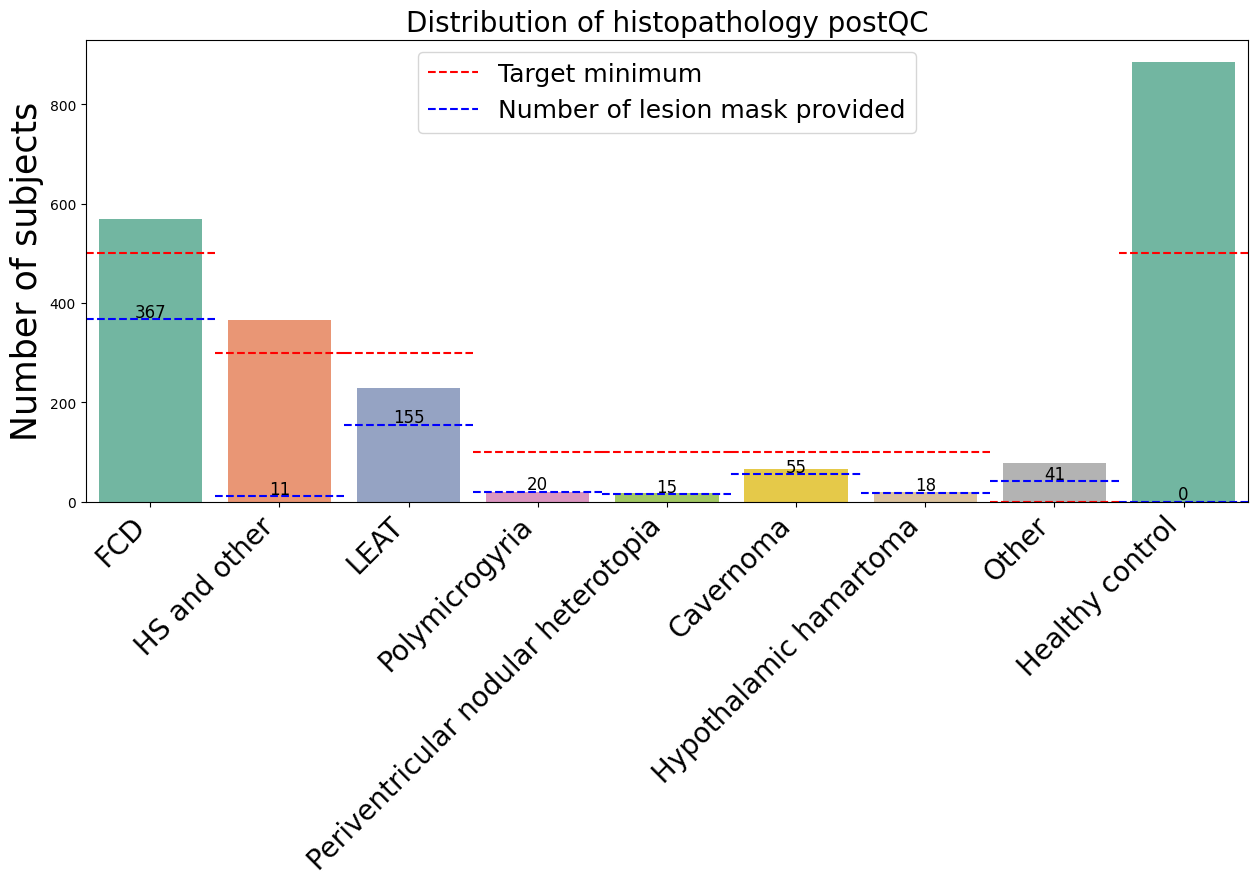

In [20]:
# plot number after QC

subdf_postQC = subdf_merge[subdf_merge['T1_available_QC']==1].reset_index()
subdf_postQC = subdf_postQC.drop(columns='index')

# add number of lesions mask provided

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf_postQC, order=list_categories, palette='Set2')
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# Add lines number of lesion mask provided above each category
for n,category in enumerate(list_categories):
    number_lesion = len(subdf_postQC[(subdf_postQC['main_category']==category) & (subdf_postQC['mask_available_QC']==1)])
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion mask provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))
    ax.annotate(f'{number_lesion}', (n, number_lesion), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Annotate each bar with the corresponding count
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='grey', xytext=(0, 5), textcoords='offset points')

ax.legend([ax.get_legend_handles_labels()[0][0], ax.get_legend_handles_labels()[0][-1]],[ax.get_legend_handles_labels()[1][0], ax.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology postQC', fontsize=20)


In [19]:
group_df = subdf_postQC.groupby(['main_category','mask_available_QC','histologically_confirmed','site',])['id'].count()

group_df.to_csv(os.path.join(meld_bids_folder,'groupby_histo_mask_site.csv'))

In [19]:
subdf_postQC.groupby(['main_category','mask_available_QC', 'histologically_confirmed','site'])['id'].count()

main_category   mask_available_QC  histologically_confirmed  site
Cavernoma       0                  True                      H115    1
                1                  False                     H14     1
                                                             H19     5
                                   True                      H102    2
                                                             H11     5
                                                                    ..
Polymicrogyria  1                  True                      H102    3
                                                             H14     1
                                                             H28     1
                                                             H4      1
                                                             H47     1
Name: id, Length: 118, dtype: int64

In [32]:
group_df

main_category   mask_available_QC  histologically_confirmed  site
Cavernoma       0                  True                      H115      1
                1                  False                     H14       1
                                                             H19       5
                                   True                      H102      2
                                                             H11       5
                                                                    ... 
Polymicrogyria  1                  True                      H28       1
                                                             H4        1
                                                             H47       1
other           0                  False                     H5        2
                                   True                      H5      402
Name: id, Length: 115, dtype: int64

## Create summary report

/tmp/ipykernel_3053/2120378112.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2', ax=ax4)
/tmp/ipykernel_3053/2120378112.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


KeyError: 'lesion_mask_MRI'

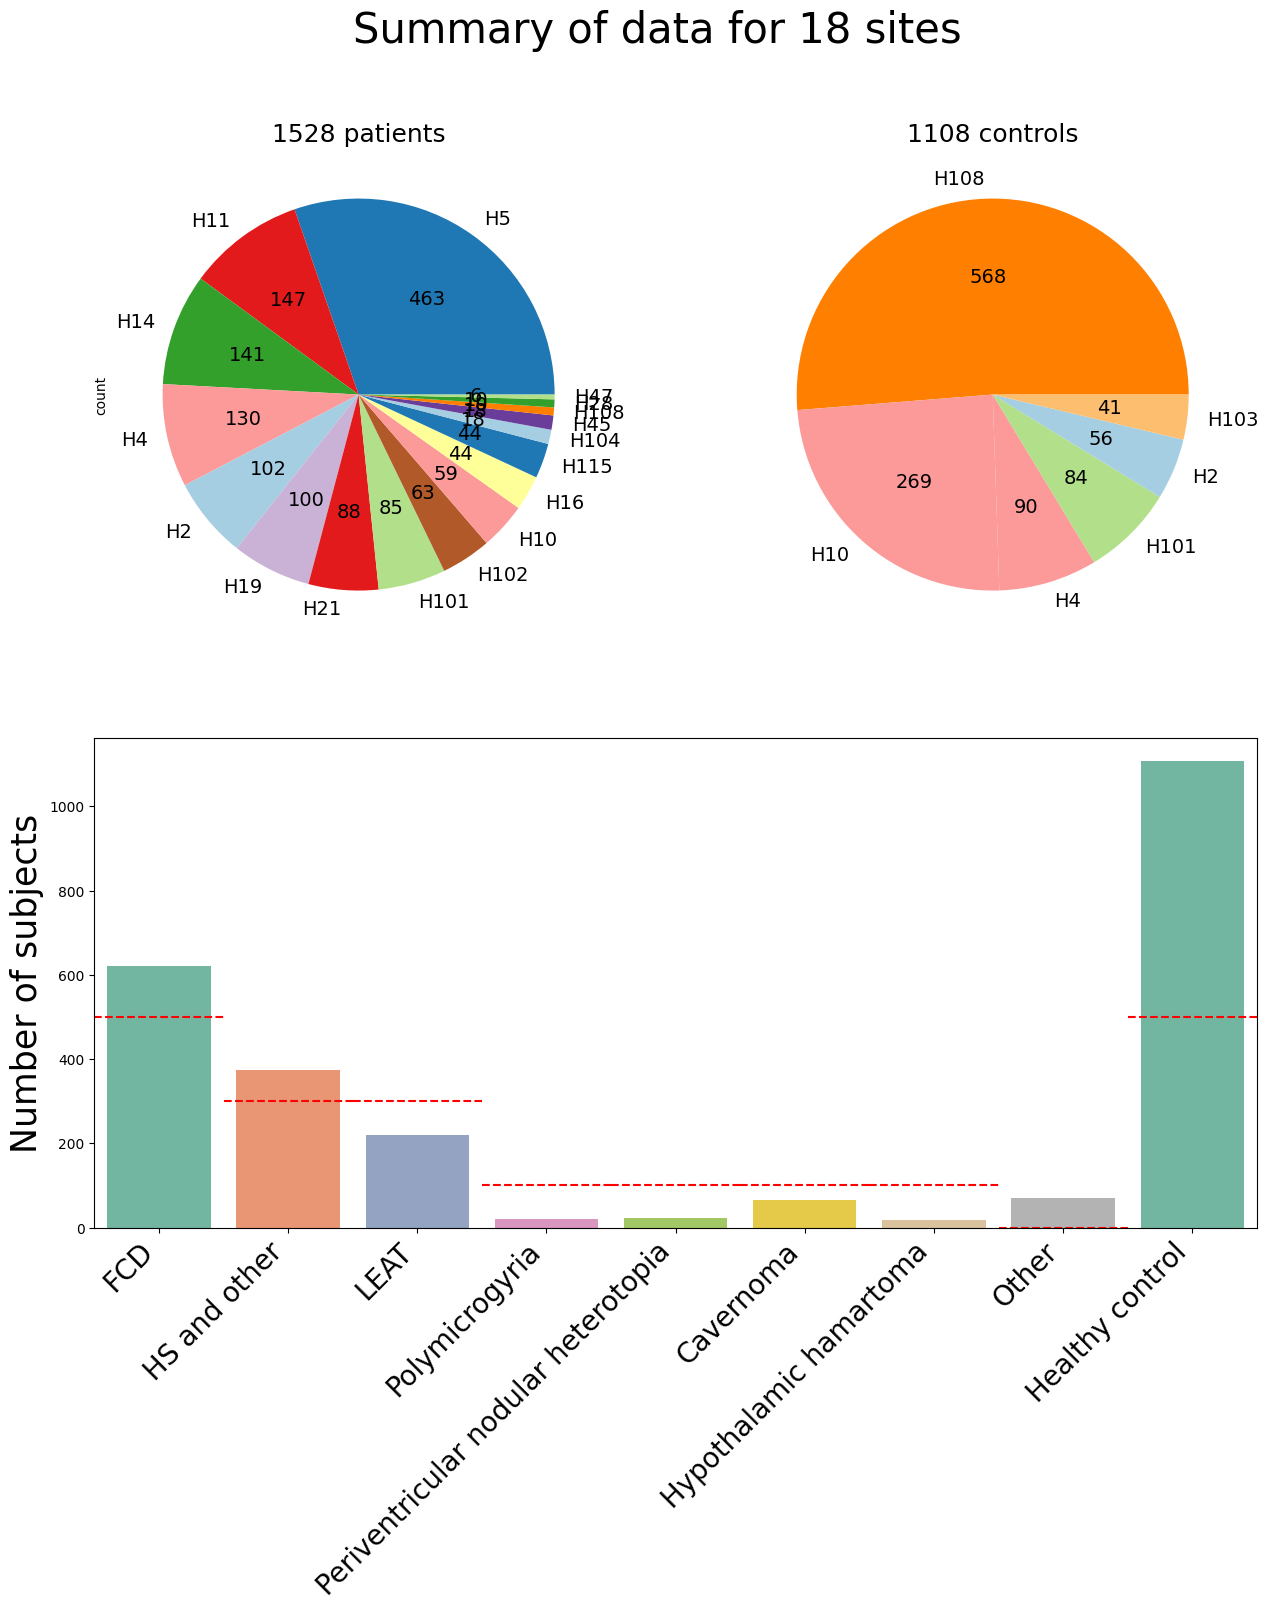

In [37]:
fig = plt.figure(figsize=(15,14))
fig.suptitle(f"Summary of data for {num_sites} sites", fontsize = 30)

gs = GridSpec(2, 2 , height_ratios=[2, 2], width_ratios=[1, 1], wspace=0.2)

##-------------------------------------------------------------
# plot patients and controls per sites
# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
ax2 = fig.add_subplot(gs[0,0])
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()
site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index], ax=ax2, fontsize=14,
)
ax2.set_xlabel('')
ax2.set_title(f'{num_patients} patients', fontsize=18)

# Create a pie chart for controls
ax3 = fig.add_subplot(gs[0,1])
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index], ax=ax3, fontsize=14,
)
ax3.set_ylabel('')
ax3.set_title(f'{num_controls} controls', fontsize=18)

##-------------------------------------------------------------
# plot graph histopathologies

ax4 = fig.add_subplot(gs[1,0:2])

g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2', ax=ax4)
ax4.set_ylabel('Number of subjects', fontsize=25)
ax4.set_xlabel('')
ax4.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax4.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# Add lines number of lesion mask provided above each category
for category in list_categories:
    number_lesion = subdf[subdf['main_category']==category]['lesion_mask_MRI'].sum()
    category_index = list_categories.index(category)  # Get the index of the category
    ax4.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion masks provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax4.legend([ax4.get_legend_handles_labels()[0][0], ax4.get_legend_handles_labels()[0][-1]],[ax4.get_legend_handles_labels()[1][0], ax4.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=15)
ax4.set_title('Histopathologies distribution', loc='center',fontsize=18, style='italic')

# fig.savefig(save_file)



